In [13]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [15]:
samplesize_confint_proportion(proportion=0.5, half_length=0.01)

9603.647051735317

In [51]:
import pandas as pd

In [40]:
from pandas import concat

In [16]:
from pandas import DataFrame

In [41]:
bounds = DataFrame({'precision': [10**(-i/2) for i in range(1,12)]}) 

In [52]:
bounds = concat([
    bounds
    .assign(accuracy=0.5)
    .assign(sample_size=lambda df: samplesize_confint_proportion(
        proportion=0.5, half_length=df['precision'], alpha=0.05)),
    bounds
    .assign(accuracy=0.7)
    .assign(sample_size=lambda df: samplesize_confint_proportion(
        proportion=0.7, half_length=df['precision'], alpha=0.05)),
    bounds
    .assign(accuracy=0.9)
    .assign(sample_size=lambda df: samplesize_confint_proportion(
        proportion=0.9, half_length=df['precision'], alpha=0.05)),
    ], axis=0)

bounds['accuracy'] = pd.Categorical(bounds['accuracy'], categories=[0.5, 0.7, 0.9], ordered=True)

In [48]:
bounds

,precision,accuracy,sample_size
0,0.316228,0.5,9.603647e+00
1,0.100000,0.5,9.603647e+01
2,0.031623,0.5,9.603647e+02
3,0.010000,0.5,9.603647e+03
4,0.003162,0.5,9.603647e+04
...,...,...,...
6,0.000316,0.9,3.457313e+06
7,0.000100,0.9,3.457313e+07
8,0.000032,0.9,3.457313e+08
9,0.000010,0.9,3.457313e+09


In [30]:
bounds['sample_size'] = samplesize_confint_proportion(proportion=0.5, half_length=bounds['precision'], alpha=0.05)

In [32]:
bounds['accuracy'] = 0.5

In [33]:
bounds

,precision,sample_size,accuracy
0,0.316228,9.603647e+00,0.5
1,0.100000,9.603647e+01,0.5
2,0.031623,9.603647e+02,0.5
3,0.010000,9.603647e+03,0.5
4,0.003162,9.603647e+04,0.5
5,0.001000,9.603647e+05,0.5
6,0.000316,9.603647e+06,0.5
7,0.000100,9.603647e+07,0.5
8,0.000032,9.603647e+08,0.5
9,0.000010,9.603647e+09,0.5


In [34]:
from plotnine import *

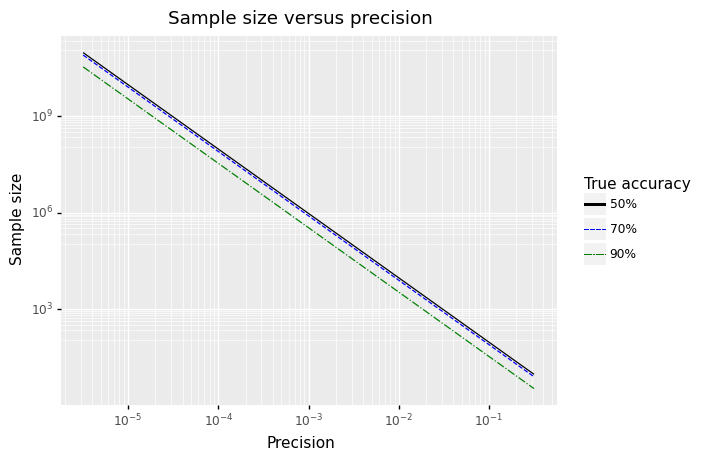

<ggplot: (707981638)>

In [77]:
p  = ggplot(bounds) + geom_line(aes(x='precision', y='sample_size', color='accuracy', linetype='accuracy'))
p += ggtitle('Sample size versus precision')
p += scale_y_log10(name='Sample size', breaks = [1000, 1000**2, 1000**3], labels =['$10^3$', '$10^6$', '$10^9$'])
p += scale_x_log10(name='Precision', 
                   breaks=[10**(-5), 10**(-4), 10**(-3), 10**(-2), 10**(-1)], 
                   labels=['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$']) 
p += scale_color_manual(name='True accuracy', values = ['black', 'blue', 'green'], labels = ['50%', '70%', '90%'])
p += scale_linetype_discrete(name='True accuracy', labels = ['50%', '70%', '90%'] ) 
display(p)
p.save('sample_size_vs_precision.pdf', verbose=False)

In [81]:
samplesize_confint_proportion(proportion=0.9, half_length=0.01, alpha=0.05)

3457.3129386247138

In [80]:
samplesize_confint_proportion(proportion=0.5, half_length=0.01, alpha=0.05)

9603.647051735317

In [82]:
samplesize_confint_proportion(proportion=0.5, half_length=0.005, alpha=0.05)

38414.58820694127

In [83]:
samplesize_confint_proportion(proportion=0.5, half_length=0.001, alpha=0.05)

960364.7051735317